In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 


In [2]:
train_dir = r'C:\Users\HP\Desktop\Raw Data\Animal Classification\train'
test_dir = r'C:\Users\HP\Desktop\Raw Data\Animal Classification\test'

In [3]:
img_hight= 224
img_width= 224

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle= True,
    image_size= (img_hight, img_width),
    batch_size = 16,
    validation_split= 0.2,
    subset='training',
    seed= 123
)

Found 1346 files belonging to 15 classes.
Using 1077 files for training.


In [5]:
valid_data=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle= True,
    image_size= (img_hight, img_width),
    batch_size = 16,
    validation_split= 0.2,
    subset='validation',
    seed= 123
    
)

Found 1346 files belonging to 15 classes.
Using 269 files for validation.


In [6]:
test_data= tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size= (img_hight, img_width),
    batch_size= 18,
    shuffle= False
)

Found 588 files belonging to 15 classes.


In [7]:
categories= train_data.class_names
categories

['Bear',
 'Bird',
 'Cat',
 'Cow',
 'Deer',
 'Dog',
 'Dolphin',
 'Elephant',
 'Giraffe',
 'Horse',
 'Kangaroo',
 'Lion',
 'Panda',
 'Tiger',
 'Zebra']

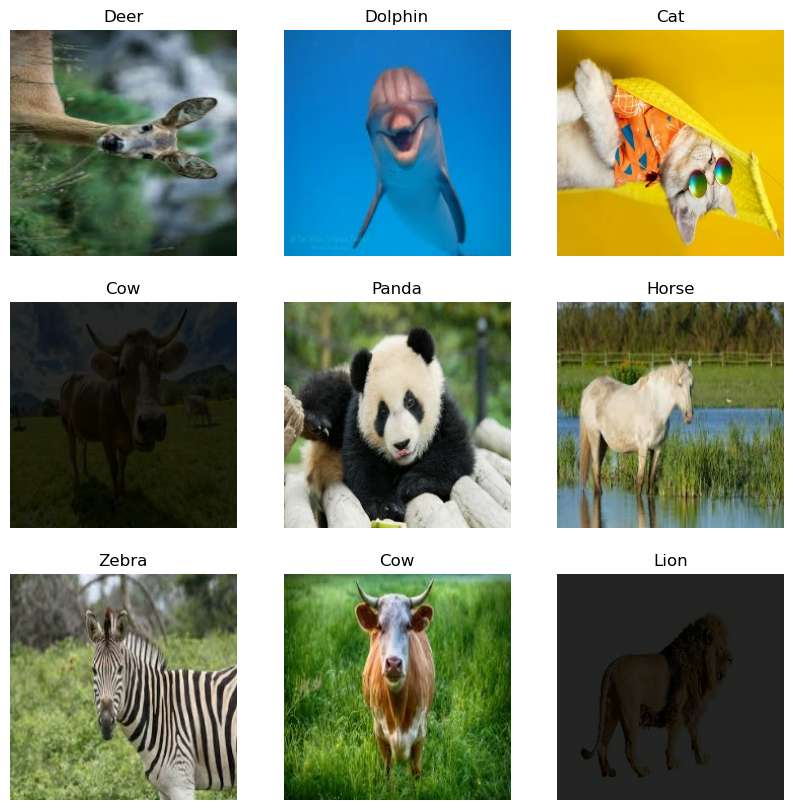

In [8]:
plt.figure(figsize=(10,10))
for image, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(categories[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
model= Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding= 'same' , activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding= 'same' , activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding= 'same' , activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(123),
    layers.Dense(len('Categories'))


    
])

In [12]:
model.compile(optimizer = 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy']) 

In [13]:
model.add(layers.Dense(15, activation='relu')) 

In [14]:
epochs_size= 25
history = model.fit(train_data, validation_data=valid_data, epochs=epochs_size)

Epoch 1/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.0732 - loss: 3.9506 - val_accuracy: 0.0892 - val_loss: 2.6463
Epoch 2/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.1956 - loss: 2.4791 - val_accuracy: 0.3123 - val_loss: 2.2370
Epoch 3/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.3940 - loss: 2.0448 - val_accuracy: 0.4647 - val_loss: 1.9915
Epoch 4/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.6025 - loss: 1.4377 - val_accuracy: 0.5762 - val_loss: 1.8331
Epoch 5/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.7721 - loss: 0.9294 - val_accuracy: 0.6543 - val_loss: 1.7324
Epoch 6/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.8673 - loss: 0.5526 - val_accuracy: 0.6766 - val_loss: 2.1675
Epoch 7/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9205 - loss: 0.3787 - val_accuracy: 0.7063 - val_loss: 2.0307
Epoch 8/25
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9655 - loss: 0.2578 - val_accu

Text(0.5, 1.0, 'Loss')

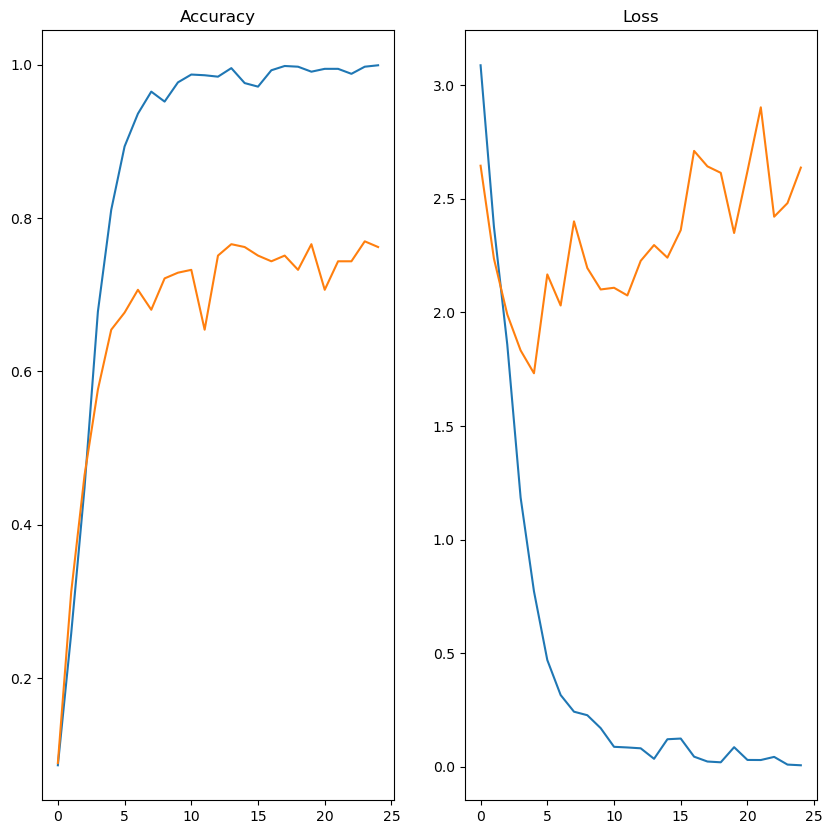

In [16]:
epochs_range=range(epochs_size)
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label= 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label= 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label= 'Validation Loss')
plt.title('Loss')



In [17]:
image= r'C:\Users\HP\Downloads\bear.jpg'
image= tf.keras.utils.load_img(image, target_size= (img_hight, img_width))
image_arry= tf.keras.utils.img_to_array(image)
img_bat= tf.expand_dims(image_arry,0)

In [18]:
predict= model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


In [19]:
score= tf.nn.softmax(predict)

In [20]:
print('The animal in the picture is {} with a confidence score of {:.2f}%'.format(categories[np.argmax(score)], np.max(score) * 100))


The animal in the picture is Bear with a confidence score of 94.26%


In [21]:
image= r'C:\Users\HP\Downloads\Lion.jpg'
image= tf.keras.utils.load_img(image, target_size= (img_hight, img_width))
image_arry= tf.keras.utils.img_to_array(image)
img_bat= tf.expand_dims(image_arry,0)

In [22]:
predict= model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [23]:
score= tf.nn.softmax(predict)

In [24]:
print('The animal in the picture is {} with a confidence score of {:.2f}%'.format(categories[np.argmax(score)], np.max(score) * 100))


The animal in the picture is Lion with a confidence score of 100.00%


In [25]:
model.save('Animal_classifier.keras')